In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
# Step 1: Preprocess the input image
def preprocess_image(image_path, img_size=(256, 256)):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize image
    image_resized = cv2.resize(image, img_size)
    # Normalize pixel values
    image_normalized = image_resized / 255.0
    return image_normalized



In [3]:
# Step 2: Automatic seed selection using intensity thresholding (Otsu's Method)
def select_seeds_intensity(image):
    # Apply Otsu's thresholding
    _, otsu_thresh = cv2.threshold((image * 255).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours of the thresholded regions
    contours, _ = cv2.findContours(otsu_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    seeds = []
    for contour in contours:
        # Find the centroid of each contour to use as a seed point
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            seeds.append((cY, cX))  # Notice that OpenCV returns coordinates as (x, y), but we use (row, col)
    
    return seeds



In [4]:
# Step 3: Automatic seed selection using edge detection (Canny Edge Detection)
def select_seeds_edges(image, low_threshold=50, high_threshold=150):
    # Apply Canny edge detection
    edges = cv2.Canny((image * 255).astype(np.uint8), low_threshold, high_threshold)
    
    # Invert the edges to get regions inside the contours
    inverted_edges = cv2.bitwise_not(edges)
    
    # Apply connected components to find regions inside the edges
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(inverted_edges, connectivity=8)
    
    seeds = []
    for centroid in centroids[1:]:  # Skip the background label (0)
        cX, cY = int(centroid[0]), int(centroid[1])
        seeds.append((cY, cX))  # Return coordinates as (row, col)
    
    return seeds



In [5]:
# Visualization of the selected seeds
def visualize_seeds(image, seeds):
    plt.figure(figsize=(10, 5))
    plt.imshow(image, cmap='gray')
    
    for seed in seeds:
        plt.scatter(seed[1], seed[0], color='red', s=40, marker='x')  # Plot seeds as red 'x'
    
    plt.title("Image with Seed Points")
    plt.show()



In [6]:
# Main function to run the seed selection pipeline
def main(image_path):
    # Step 1: Preprocess the image
    image = preprocess_image(image_path)
    
    # Step 2: Select seeds using intensity-based method
    seeds_intensity = select_seeds_intensity(image)
    print(f"Seeds selected by intensity thresholding: {seeds_intensity}")
    
    # Step 3: Select seeds using edge detection-based method
    seeds_edges = select_seeds_edges(image)
    print(f"Seeds selected by edge detection: {seeds_edges}")
    
    # Visualize the seeds selected by intensity thresholding
    print("Seeds from intensity thresholding:")
    visualize_seeds(image, seeds_intensity)
    
    # Visualize the seeds selected by edge detection
    print("Seeds from edge detection:")
    visualize_seeds(image, seeds_edges)



Seeds selected by intensity thresholding: [(240, 38), (222, 4), (226, 237), (159, 175), (56, 11), (28, 253), (15, 174), (10, 87), (7, 94), (132, 122), (10, 13)]
Seeds selected by edge detection: [(125, 128), (8, 61), (178, 0), (186, 101)]
Seeds from intensity thresholding:


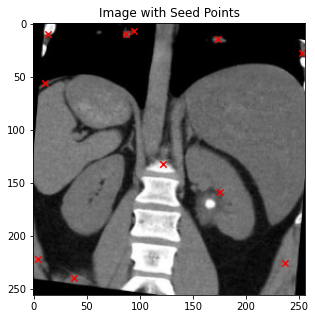

Seeds from edge detection:


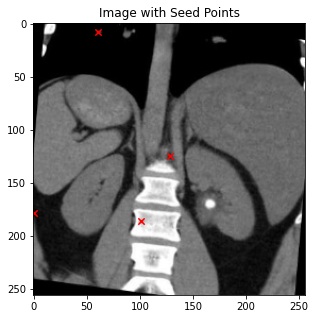

In [9]:
# Example usage
if __name__ == "__main__":
    image_dir_path = "../data/train/images"
    image_file = "1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.74493ef7bdab6de49e88f708a5745000.jpg"
    image_file_path = os.path.join(image_dir_path, image_file)
    main(image_file_path)